<h1 align="center">Importation de bibliothèque</h1>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import chardet
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


<h1 align="center">Importation des données</h1>

In [143]:
with open('D:/DossierSara/DEDS/semester 3/TNP/application de classification/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
df=pd.read_csv('D:/DossierSara/DEDS/semester 3/TNP/application de classification/spam.csv', encoding=result['encoding'])
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<h1 align="center">Préparation des données</h1>

In [144]:
df.shape

(5572, 5)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [146]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [147]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
df=df.rename(columns = {'v1': 'type', 'v2': 'message'})

df['length'] = df['message'].apply(len)
df.head()

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<h1 align="center">Visualisation </h1>

<AxesSubplot:>

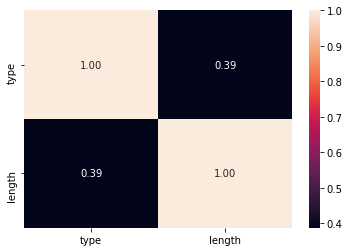

In [169]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [149]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

C:\Users\MBM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

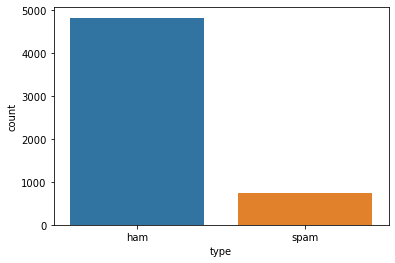

In [150]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='type', ylabel='length'>

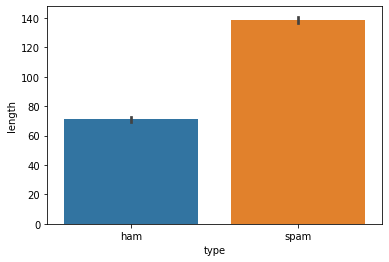

In [151]:
sns.barplot(x='type',y='length',data=df)

<h2> Appliquer une expression régulière</h2>
<ul> <li>Remplacer les adresses e-mail par 'emailaddr'</li>
     <li>Remplacer les URL par 'httpaddr'</li>
     <li>Remplacez les symboles d'argent par 'moneysymb'</li>
     <li>Remplacer les numéros de téléphone par 'phonenumbr'</li>
     <li>Remplacer les nombres par 'numbr'</li>
</ul>

In [152]:
#original message
print(df["message"][2])
print(df["message"][14])
print(df["message"][17])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
I HAVE A DATE ON SUNDAY WITH WILL!!
Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.


In [153]:
for i in range(0, 5572):
    df['message'][i] = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['message'][i])
    df['message'][i] = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['message'][i])
    df['message'][i] = re.sub('£|\$', 'moneysymb', df['message'][i])
    df['message'][i] = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['message'][i])
    df['message'][i] = re.sub('\d+(\.\d+)?', 'numbr', df['message'][i])

<ipython-input-153-3434640c6a75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i] = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['message'][i])
<ipython-input-153-3434640c6a75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i] = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['message'][i])
<ipython-input-153-3434640c6a75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mess

<ul><li>Supprimer toutes les ponctuations</li>
<li>Chaque mot en minuscule</li>
</ul>

In [154]:
for i in range(0, 5572):
    df['message'][i] = re.sub('[^\w\d\s]',' ', df['message'][i])
    df['message'][i]=df['message'][i].lower()  

<ipython-input-154-f8119a4c8921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i] = re.sub('[^\w\d\s]',' ', df['message'][i])
<ipython-input-154-f8119a4c8921>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i]=df['message'][i].lower()


In [155]:
#après le nettoyage
print(df["message"][2])
print(df["message"][14])
print(df["message"][17])

free entry in numbr a wkly comp to win fa cup final tkts numbrst may numbr  text fa to numbr to receive entry question std txt rate t c s apply numbrovernumbr s
i have a date on sunday with will  
eh u remember how numbr spell his name    yes i did  he v naughty make until i v wet 


<h2>Fractionner des mots à tokeniser</h2>

In [156]:
for i in range(0, 5572):
    df["message"][i] = df["message"][i].split() 
print(df["message"][2])   

<ipython-input-156-a5beeb3d7570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"][i] = df["message"][i].split()


['free', 'entry', 'in', 'numbr', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'numbrst', 'may', 'numbr', 'text', 'fa', 'to', 'numbr', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'numbrovernumbr', 's']


<h2>Stemming</h2>

In [157]:
ps = PorterStemmer()
for i in range(0, 5572):
    df["message"][i] = [ps.stem(word) for word in df["message"][i] if not word in set(stopwords.words('english'))]
    
print(df["message"][2])   

<ipython-input-157-f1bc5d8a4e04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"][i] = [ps.stem(word) for word in df["message"][i] if not word in set(stopwords.words('english'))]


['free', 'entri', 'numbr', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'numbrst', 'may', 'numbr', 'text', 'fa', 'numbr', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', 'numbrovernumbr']


<h2>Préparer des messages avec des jetons restants</h2>

In [158]:
for i in range(0, 5572):
    df["message"][i] = ' '.join(df["message"][i])
print(df["message"][2]) 

<ipython-input-158-d6cd9679c557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"][i] = ' '.join(df["message"][i])


free entri numbr wkli comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr


<h2>Préparation du corpus WordVector</h2>

In [159]:
corpus = []
for i in range(0, 5572):
    corpus.append(df["message"][i])
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri numbr wkli comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl numbr week word back like fun still tb ok xxx std chg send åmoneysymbnumbr rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press numbr copi friend callertun',
 'winner valu network custom select receivea åmoneysymbnumbr prize reward claim call numbr claim code klnumbr valid numbr hour',
 'mobil numbr month u r entitl updat latest colour mobil camera free call mobil updat co free numbr',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash numbr numbr numbr pound txt cshnumbr send numbr cost numbrp day numbrday numbr tsan

<h1 align="center">Application de la classification avec 2 modèles</h1>

In [160]:
# Remplacer ham par 0 et spam par 1
df = df.replace(['ham','spam'],[0, 1]) 
df.head(3)

,type,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri numbr wkli comp win fa cup final tk...,155


In [161]:
#Transformer les données en valeur numérique 
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [162]:
le = LabelEncoder()
y = df['type']
y = le.fit_transform(y)

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=30)

<h2> Naif Bayes Classifier</h2>

In [164]:
NBmodel=MultinomialNB()
NBmodel.fit(X_train, y_train)
predict=NBmodel.predict(X_test)
matrix = confusion_matrix(y_test, predict)
NBaccuracy = accuracy_score(y_test, predict)

print(matrix)
print("Accuracy Score:", NBaccuracy)
print(classification_report(y_test, predict))

[[1437   28]
 [  12  195]]
Accuracy Score: 0.9760765550239234
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1465
           1       0.87      0.94      0.91       207

    accuracy                           0.98      1672
   macro avg       0.93      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



<h2>Random Forest</h2>

In [165]:
RFmodel= RandomForestClassifier()
RFmodel.fit(x_train, y_train)
RFmodel_predict=RFmodel.predict(x_test)
RFmatrix = confusion_matrix(y_test, RFmodel_predict)
RFaccuracy = accuracy_score(y_test, RFmodel_predict)

print(RFmatrix)
print("Accuracy Score:", RFaccuracy)
print(classification_report(y_test,RFmodel_predict))

[[1463    2]
 [  28  179]]
Accuracy Score: 0.9820574162679426
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       0.99      0.86      0.92       207

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



<h2>Decision Tree Classifier</h2>

In [166]:
DTmodel= DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)
DTmodel_predict=DTmodel.predict(x_test)
DTmatrix = confusion_matrix(y_test, DTmodel_predict)
DTaccuracy = accuracy_score(y_test, DTmodel_predict)

print(DTmatrix)
print("Accuracy Score:", DTaccuracy)
print(classification_report(y_test,DTmodel_predict))

[[1449   16]
 [  22  185]]
Accuracy Score: 0.9772727272727273
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1465
           1       0.92      0.89      0.91       207

    accuracy                           0.98      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



<h1 align="center">Resultat Final </h1>

In [171]:
print("------------------------------------------------")
print("---    Naif Bayes Classifier :     {:.2f}%".format(100 * NBaccuracy),"   ---")
print("---    Random Forest :             {:.2f}%".format(100 * RFaccuracy),"   ---")
print("---    Decision Tree Classifier :  {:.2f}%".format(100 * DTaccuracy),"   ---")
print("------------------------------------------------")

------------------------------------------------
---    Naif Bayes Classifier :     97.61%    ---
---    Random Forest :             98.21%    ---
---    Decision Tree Classifier :  97.73%    ---
------------------------------------------------
